<a href="https://colab.research.google.com/github/prashanth-ds-ml/PyTorch/blob/main/PyTorch_Simple_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

In [28]:
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples,noise = 0.3,random_state=7)

In [29]:
len(X),len(y)

(1000, 1000)

In [30]:
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})
circles.head()

,X1,X2,label
0,-0.809309,-0.258682,1
1,-0.382221,-0.909287,0
2,-1.013966,-0.172947,0
3,-0.892713,-0.613640,1
4,-0.888352,0.354795,0


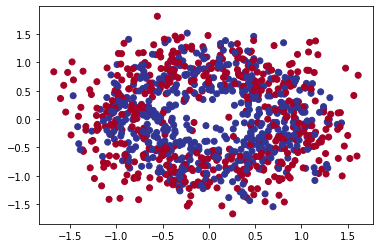

In [31]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap = plt.cm.RdYlBu);

In [32]:
X.shape,y.shape

((1000, 2), (1000,))

In [33]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [34]:
type(X)

torch.Tensor

In [35]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 7)

In [37]:
print(f'shape of X_train: {X_train.shape}')
print(f'shape of X_test: {X_test.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of y_test: {y_test.shape}')

shape of X_train: torch.Size([800, 2])
shape of X_test: torch.Size([200, 2])
shape of y_train: torch.Size([800])
shape of y_test: torch.Size([200])


In [38]:
from torch import nn

In [39]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [40]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2,out_features=500)
    self.layer2 = nn.Linear(in_features=500,out_features=1)

  def forward(self,x):
    return self.layer2(self.layer1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=500, bias=True)
  (layer2): Linear(in_features=500, out_features=1, bias=True)
)

In [41]:
model_0 = nn.Sequential(
    nn.Linear(in_features = 2,out_features= 500),
    nn.Linear(in_features = 500,out_features = 1000),
    nn.Linear(in_features = 1000,out_features =1)
    ).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=500, bias=True)
  (1): Linear(in_features=500, out_features=1000, bias=True)
  (2): Linear(in_features=1000, out_features=1, bias=True)
)

In [42]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[ 1.5356e-01,  2.7598e-01],
                      [-1.0708e-01,  3.1687e-01],
                      [-6.6794e-01, -2.3133e-02],
                      [-6.0226e-01,  2.7839e-01],
                      [ 4.9212e-01, -2.6246e-01],
                      [-1.3421e-01,  3.1067e-01],
                      [-3.1543e-01,  3.3228e-01],
                      [-4.8171e-01, -2.0474e-02],
                      [-2.7487e-02, -6.0868e-01],
                      [-7.5496e-02, -6.6614e-02],
                      [-5.6030e-03,  6.6859e-01],
                      [-1.0945e-01,  4.1175e-01],
                      [-2.0591e-01, -3.7605e-01],
                      [-7.5926e-02, -4.1452e-01],
                      [-3.0894e-01, -1.8337e-01],
                      [ 4.8096e-02, -3.9287e-01],
                      [-3.7321e-01, -5.1526e-01],
                      [-4.2243e-01, -6.2441e-01],
                      [-4.8790e-01, -2.0443e-01],
                      [-9.7273e-02,  4

In [43]:
# making predictions

untrained_preds = model_0(X_test.to(device))
print(f'length of predictions:{len(untrained_preds)},shape:{untrained_preds.shape}')
print(f'length of test samples:{len(X_test)},shape:{X_test.shape}')
print(f'\n first 10 predictions:\n{untrained_preds[:10]}')
print(f'\n first 10 labels:\n {y_test[:10]}')

length of predictions:200,shape:torch.Size([200, 1])
length of test samples:200,shape:torch.Size([200, 2])

 first 10 predictions:
tensor([[0.3034],
        [0.3996],
        [0.2005],
        [0.1919],
        [0.2698],
        [0.2903],
        [0.2620],
        [0.1960],
        [0.2761],
        [0.2564]], grad_fn=<SliceBackward0>)

 first 10 labels:
 tensor([1., 0., 0., 1., 1., 1., 1., 0., 1., 0.])


In [44]:
X_test[:10],y_test[:10]

(tensor([[-0.4552, -0.2078],
         [-1.2672, -0.3900],
         [ 0.3120,  1.0726],
         [ 0.4269,  0.6329],
         [-0.1116, -0.7757],
         [-0.3178, -0.4647],
         [-0.1613,  0.4659],
         [ 0.4211,  0.3183],
         [-0.2687,  0.3106],
         [-0.1848,  1.2321]]),
 tensor([1., 0., 0., 1., 1., 1., 1., 0., 1., 0.]))

In [45]:
# setting up loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr = 0.01)

In [46]:
# accuray function

def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [47]:
# training loop

# going from raw logits -> prediction probabilites -> prediction labels
# beacause our model gives outputs in raw logits we convert them by passin them through activation layers
# then convert the probabilites given by the activation functions to the prediction labels

model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.3034],
        [0.3996],
        [0.2005],
        [0.1919],
        [0.2698]])

In [48]:
y_test[:5]

tensor([1., 0., 0., 1., 1.])

In [49]:
y_preds_prob = torch.sigmoid(y_logits)
y_preds_prob

tensor([[0.5753],
        [0.5986],
        [0.5499],
        [0.5478],
        [0.5670]])

In [50]:
y_pred = torch.round(y_preds_prob)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print(torch.eq(y_pred.squeeze(),y_pred_labels.squeeze()))
y_pred.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

In [51]:
torch.manual_seed(7)
torch.cuda.manual_seed(7)

epochs = 1000

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  # forward pass

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss / accuracy

  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true = y_train,y_pred = y_pred)

  # optimizer zero grad

  optimizer.zero_grad()

  # loss backward 

  loss.backward()

  # optimizer step (gradient descent)

  optimizer.step()

  ### testing
  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits)) 
    # calculate test loss
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true = y_test,y_pred = test_pred)

  if epoch % 20 == 0:
    print(f"Epoch:{epoch} | Loss:{loss:.5f}, Acc : {acc:.2f} | Test loss: {test_loss:.3f} | Test acc: {test_acc:.2f}% ")

Epoch:0 | Loss:0.70581, Acc : 48.38 | Test loss: 0.687 | Test acc: 56.50% 
Epoch:20 | Loss:0.69260, Acc : 51.62 | Test loss: 0.698 | Test acc: 43.50% 
Epoch:40 | Loss:0.69259, Acc : 51.62 | Test loss: 0.698 | Test acc: 43.50% 
Epoch:60 | Loss:0.69259, Acc : 51.62 | Test loss: 0.698 | Test acc: 43.50% 
Epoch:80 | Loss:0.69259, Acc : 51.62 | Test loss: 0.698 | Test acc: 43.50% 
Epoch:100 | Loss:0.69259, Acc : 51.62 | Test loss: 0.698 | Test acc: 43.50% 
Epoch:120 | Loss:0.69259, Acc : 51.62 | Test loss: 0.698 | Test acc: 43.50% 
Epoch:140 | Loss:0.69259, Acc : 51.62 | Test loss: 0.698 | Test acc: 43.50% 
Epoch:160 | Loss:0.69259, Acc : 51.62 | Test loss: 0.698 | Test acc: 43.50% 
Epoch:180 | Loss:0.69259, Acc : 51.62 | Test loss: 0.698 | Test acc: 43.50% 
Epoch:200 | Loss:0.69259, Acc : 51.62 | Test loss: 0.698 | Test acc: 43.50% 
Epoch:220 | Loss:0.69259, Acc : 51.62 | Test loss: 0.698 | Test acc: 43.50% 
Epoch:240 | Loss:0.69259, Acc : 51.62 | Test loss: 0.698 | Test acc: 43.50% 
Epoch